In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#Getting info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Getting count of null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The data contains 11 columns. 
- Passenger id, Ticket, and Name are identifier columns and are irrelevant to our analysis. We hence drop the column
- Cabin column has 687 null values. There is no point in filling the column with augmented values as we have to fill around 80% of values. We'll drop the column
- Let us analyse the remaining columns

In [8]:
data.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace=True)

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


- These are the seven columns that will be used on our analysis. 
- Of these 'survived' column serves as a target column, while the remaining serve as predictors.
- We'll analyse the spread of the data as a part of EDA

In [11]:
discrete_col = ['Sex','Embarked','Pclass','Survived','SibSp','Parch']
continuous_col = ['Age','Fare']

<Axes: xlabel='Pclass', ylabel='count'>

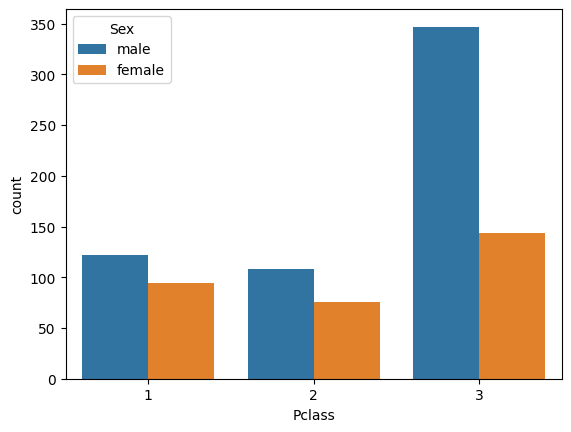

In [12]:
sns.countplot(x=data.Pclass,hue = data.Sex)

<Axes: xlabel='Embarked', ylabel='count'>

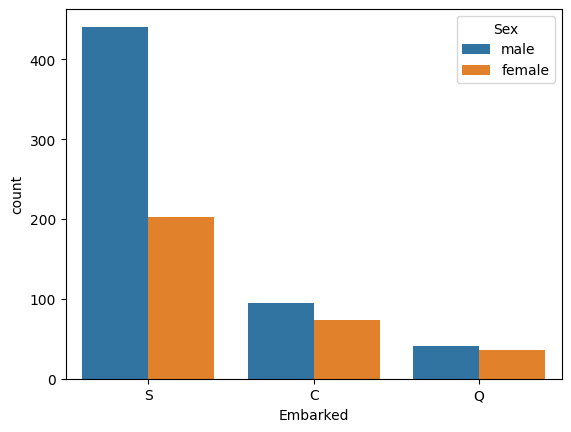

In [13]:
sns.countplot(x=data.Embarked,hue = data.Sex)

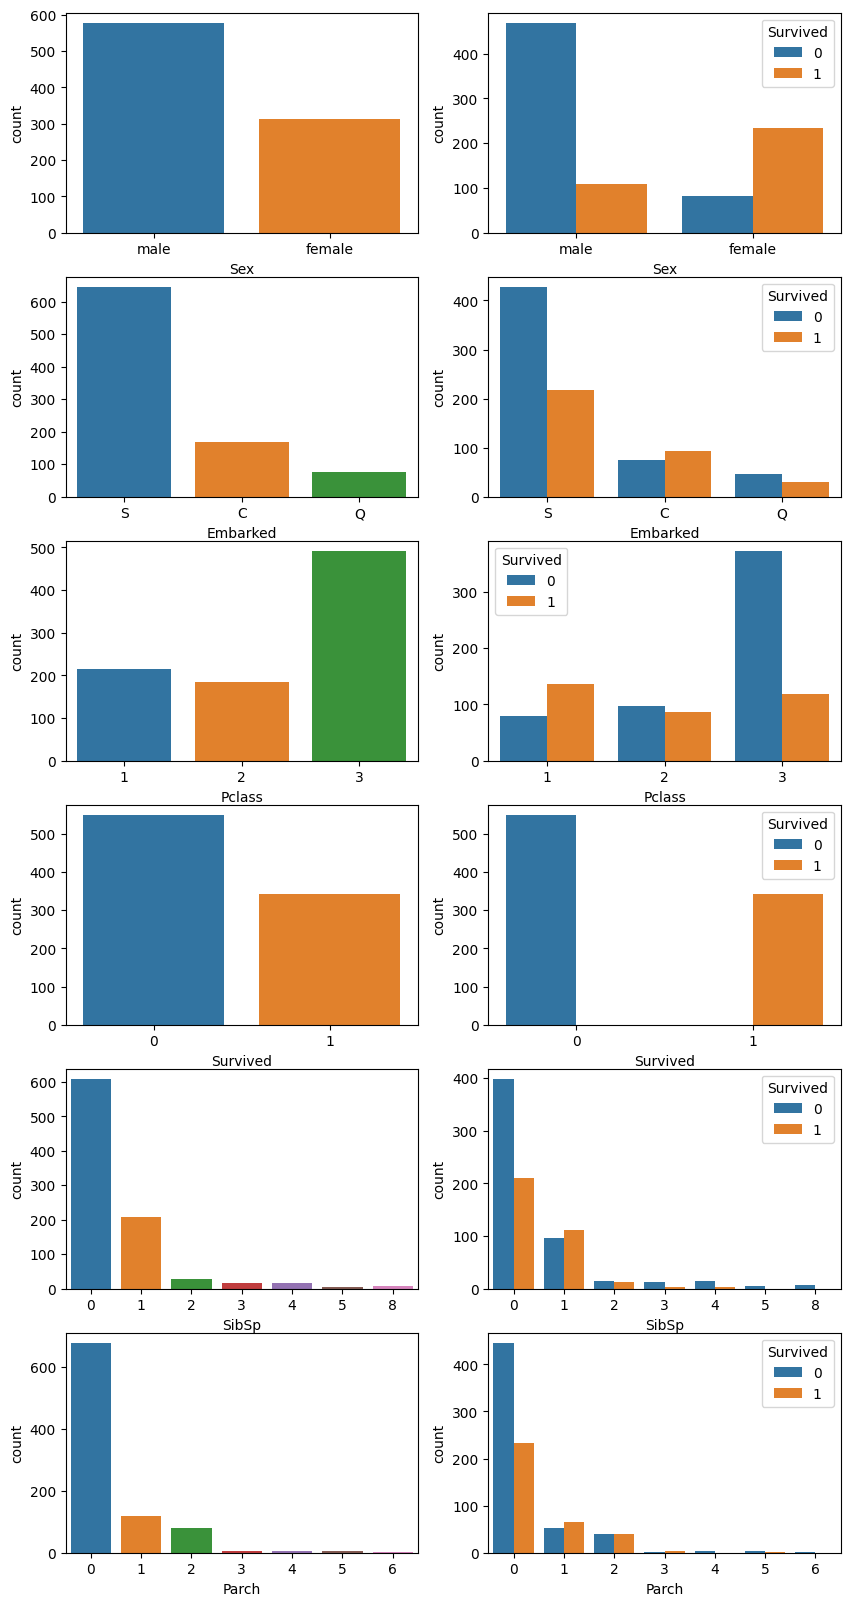

In [14]:
plt.figure(figsize=(10,20))
plt_num=1
for i in discrete_col:
    plt.subplot(6,2,plt_num)
    sns.countplot(x=data[i])
    plt.xlabel(i)
    plt.subplot(6,2,plt_num+1)
    sns.countplot(x=data[i],hue=data.Survived)
    plt.xlabel(i)
    plt_num+=2

/tmp/ipykernel_19/1908917435.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
/tmp/ipykernel_19/1908917435.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


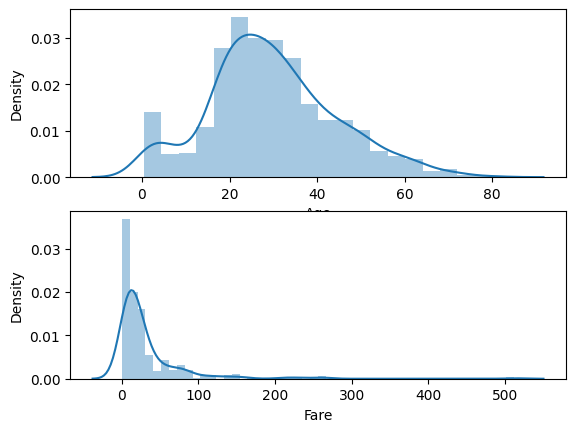

In [15]:
plt_num=1
for i in continuous_col:
    plt.subplot(2,1,plt_num)
    sns.distplot(data[i])
    plt_num+=1

## Insights
- On the whole, 1/3rds of the passengers survived. 
- Over 2/3rds of the total passengers are males. But of them, the survival proportion has been considerably large in females. 75% of females have survived, while, 20% of males have survived. This coud be partially attributed to prioritising females and kids in rescue operations.
- Most passengers (over 60%) have embarked at Southampton (S),followed by Cherbourg (C) and the least count of passengers is from Queenstown (Q). But of them, higher survival rate is in those who boarded from Cherbourg (C) (~60%), followed by Queenstown (>50%). The survival proportion in passengers who boarded from southampton is <50%.
- Majority of passengers (nearly 60%) belonged to 3rd class, while, the remaining of the passengers are equally distributed in 1 and 2 classes. But if we observe survival, more than 65% of 1st class passengers survived, around 45% of 2nd class passengers survived. The survival rate in 3rd class passengers is too less (~25%)
- The count of survived is more in males since their overall count is more. 
- Most of the passengers (over 2/3rds) were traveling alone without siblings or spouse aboard.Few, around 20% had a sibling/spouse aboard. Very few count had 2 or more siblings/spouse present in the travel. Of those who had 1 sibling/spouse aboard, had more survival percentage. This could be attributed to men's attempt to save their women.
- Most of the passgeners, over 75% had no parent/sibling aboard. A little proportion, about 25% had one/two parent/child aboard. Very less number of passengers had more than 2 parents/children aboard. However, of those who had one child/parent aboard, the survival was more. This probably could be attributed to parents trying to save their children first.
- Instead of siblings/spouse, we can make a column called family that would include all family members together.
- Majority of passengers are in age group of 20-35. There seem to be a good number of toddlers too, on board.
- Most people have paid a fare of 6-10. A portion of passengers haven't paid any fare. It could be probably due to any promotional or priveleged offers, or due to age (kids aren't charged until a certain age).

In [16]:
data['Family']= data.SibSp + data.Parch
data.drop(['SibSp','Parch'],axis=1,inplace=True)

- The final data is now available for us to analyse

In [17]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Family        0
dtype: int64

- Data imputation: Since the age values follow a close to normal distribution, we may replace the missing values with the mean value of age. (Let us observe mean and median values)
- The missing values in embarked column shall be replaced with the mode of the values


In [18]:
#Ceil function is used to avoid too long floating value
data.loc[data.Age.isnull(),'Age'] = np.ceil(data.Age.mean())

In [19]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
data.loc[data.Embarked.isnull(),'Embarked'] = data.Embarked.unique()[0]

- Next step is encoding. 
- There are two object columns Embarked and Sex. 
- Since Sex is a non ordinal column, we'll do manual one hot encoding by pd.get dummies()
- Embarked column shall be encoded by map function

In [21]:
data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [22]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In [23]:
data['Male'] = pd.get_dummies(data.Sex)['male']
data['Female'] = pd.get_dummies(data.Sex)['female']
data.drop('Sex',axis=1,inplace=True)

In [24]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
data.Embarked = data.Embarked.map({'S':0,'C':1,'Q':2})

<Axes: >

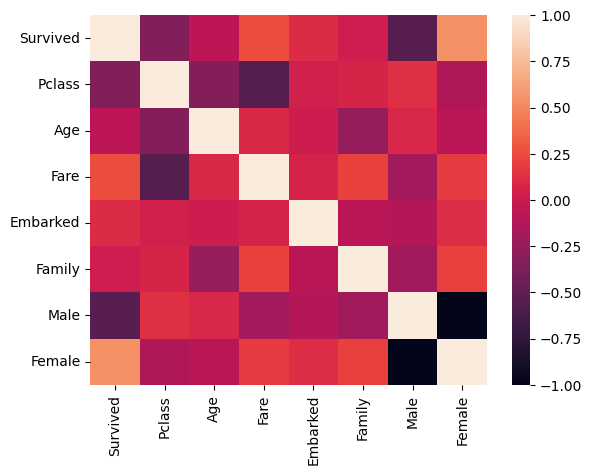

In [26]:
#Observing heat map of correlation
sns.heatmap(data.corr())

- The heat map shows no evidence of strong correlation between features, which might bias the model.
- The high negative correlation between the male and female columns is acceptable, as they were dummies from same column
- We can now proceed to scaling to get all features values in common range of 0-1

In [27]:
#Defining predictor and target variables
x = data.drop('Survived',axis=1)
y = data.Survived

In [28]:
x.head()

,Pclass,Age,Fare,Embarked,Family,Male,Female
0,3,22.0,7.2500,0,1,True,False
1,1,38.0,71.2833,1,1,False,True
2,3,26.0,7.9250,0,0,False,True
3,1,35.0,53.1000,0,1,False,True
4,3,35.0,8.0500,0,0,True,False


In [29]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- The value counts do not indicate severe imbalance in data set. The existing imbalance is acceptable.

In [30]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_col = x.columns
x = pd.DataFrame(MMS.fit_transform(x),columns=x_col)
x.head()

,Pclass,Age,Fare,Embarked,Family,Male,Female
0,1.0,0.271174,0.014151,0.0,0.1,1.0,0.0
1,0.0,0.472229,0.139136,0.5,0.1,0.0,1.0
2,1.0,0.321438,0.015469,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.103644,0.0,0.1,0.0,1.0
4,1.0,0.434531,0.015713,0.0,0.0,1.0,0.0


- We now have a encoded and scaled data, ready to be modeled with classification algorithms. 
- Since the data is moderately balanced, we dont have to resort to synthetic data.
- Since this is a binary classification problem, we shall apply Logistic Regression, KNN, Naive Bayes, SVM, Decision Tree, RF Classifier, XGB Classifier with hyper parameter tuning wherever possible.
- Let us use 10% of existing data for testing our models, so that we can pick the right model.

In [31]:
#Train test split and importing metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [32]:
#Empty data frame for results
Results = pd.DataFrame(index=['Accuracy','Precision','Recall','F1'])

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg'] = [acc,pr,re,f1]

Accuracy:  0.8333333333333334 
Precision:  0.7837837837837838 
Recall Score 0.8055555555555556 
F1 Score 0.7945205479452055 
Confusion Matrix
 [[46  8]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN5 = KNeighborsClassifier(n_neighbors = 5)
KNN5.fit(x_train,y_train)
y_pred = KNN5.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN'] = [acc,pr,re,f1]

Accuracy:  0.8444444444444444 
Precision:  0.7894736842105263 
Recall Score 0.8333333333333334 
F1 Score 0.8108108108108109 
Confusion Matrix
 [[46  8]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



In [35]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()  #Creating instance
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['NB'] = [acc,pr,re,f1]

Accuracy:  0.8111111111111111 
Precision:  0.7567567567567568 
Recall Score 0.7777777777777778 
F1 Score 0.7671232876712328 
Confusion Matrix
 [[45  9]
 [ 8 28]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90



In [36]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT'] = [acc,pr,re,f1]

Accuracy:  0.7777777777777778 
Precision:  0.6904761904761905 
Recall Score 0.8055555555555556 
F1 Score 0.7435897435897436 
Confusion Matrix
 [[41 13]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        54
           1       0.69      0.81      0.74        36

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.79      0.78      0.78        90



In [37]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF'] = [acc,pr,re,f1]

Accuracy:  0.8222222222222222 
Precision:  0.75 
Recall Score 0.8333333333333334 
F1 Score 0.7894736842105262 
Confusion Matrix
 [[44 10]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.75      0.83      0.79        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



In [38]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM'] = [acc,pr,re,f1]

Accuracy:  0.8333333333333334 
Precision:  0.8387096774193549 
Recall Score 0.7222222222222222 
F1 Score 0.7761194029850746 
Confusion Matrix
 [[49  5]
 [10 26]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        54
           1       0.84      0.72      0.78        36

    accuracy                           0.83        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.83      0.83      0.83        90



In [39]:
#Bagging with KNN as base
from sklearn.ensemble import BaggingClassifier
KNN5 = KNeighborsClassifier(n_neighbors = 5)
model_bagg=BaggingClassifier(base_estimator=KNN5,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN with bagging'] = [acc,pr,re,f1]

Accuracy:  0.8444444444444444 
Precision:  0.8235294117647058 
Recall Score 0.7777777777777778 
F1 Score 0.7999999999999999 
Confusion Matrix
 [[48  6]
 [ 8 28]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        54
           1       0.82      0.78      0.80        36

    accuracy                           0.84        90
   macro avg       0.84      0.83      0.84        90
weighted avg       0.84      0.84      0.84        90



/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [40]:
#Gradient Boosting classification
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() 
gbm.fit(x_train,y_train)
y_pred=gbm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['GB'] = [acc,pr,re,f1]

Accuracy:  0.8444444444444444 
Precision:  0.7894736842105263 
Recall Score 0.8333333333333334 
F1 Score 0.8108108108108109 
Confusion Matrix
 [[46  8]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



In [41]:
#XG Boosting
#XG Boosting
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB'] = [acc,pr,re,f1]

Accuracy:  0.8222222222222222 
Precision:  0.7272727272727273 
Recall Score 0.8888888888888888 
F1 Score 0.7999999999999999 
Confusion Matrix
 [[42 12]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.73      0.89      0.80        36

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.84      0.82      0.82        90



In [42]:
Results

,LogReg,KNN,NB,DT,RF,SVM,KNN with bagging,GB,XGB
Accuracy,0.833333,0.844444,0.811111,0.777778,0.822222,0.833333,0.844444,0.844444,0.822222
Precision,0.783784,0.789474,0.756757,0.690476,0.750000,0.838710,0.823529,0.789474,0.727273
Recall,0.805556,0.833333,0.777778,0.805556,0.833333,0.722222,0.777778,0.833333,0.888889
F1,0.794521,0.810811,0.767123,0.743590,0.789474,0.776119,0.800000,0.810811,0.800000


- Though with each run, the results of metrics are slightly different, on an average, KNN algorithm seems to be yielidng consistently higher accuracy (84%) and an overall good F1 score of 81%
- Let us now tune for right value of k

[20.0, 14.444444444444445, 16.666666666666668, 20.0, 15.555555555555555, 14.444444444444445, 17.77777777777778, 15.555555555555555, 17.77777777777778, 16.666666666666668, 14.444444444444445]


Text(0.5, 1.0, 'K vs Error')

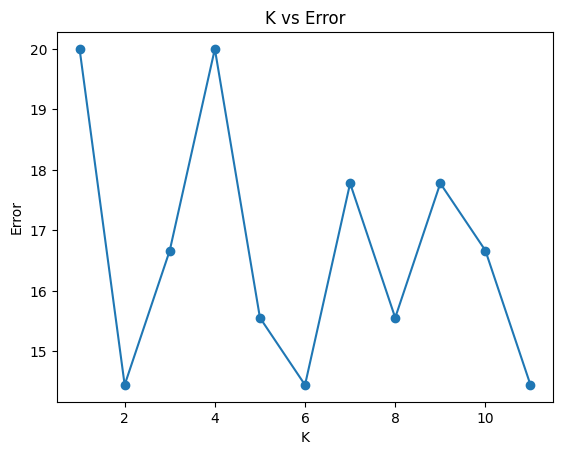

In [43]:
err=[]
for i in range(1,12):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(x_train,y_train)
    y_pred = KNN.predict(x_test)
    err.append((y_test != y_pred).sum()*100/len(y_test))
print(err)
plt.plot(range(1,12),err,marker='o')
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K vs Error') 


- From the K vs Error graph, k=6 or 11, seems to be optimal number of neighbors for consideration
- However since its a classification problem, an odd value of k is recommended.
- However we'll model for both n values and choose our best value

In [44]:
#Remodeling the data with KNN of 6 neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN6 = KNeighborsClassifier(n_neighbors = 6)
KNN6.fit(x_train,y_train)
y_pred = KNN6.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN with n=6'] = [acc,pr,re,f1]

Accuracy:  0.8555555555555555 
Precision:  0.8709677419354839 
Recall Score 0.75 
F1 Score 0.8059701492537312 
Confusion Matrix
 [[50  4]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.87      0.75      0.81        36

    accuracy                           0.86        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.86      0.86      0.85        90



In [45]:
#KNN with 11 neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN11 = KNeighborsClassifier(n_neighbors = 11)
KNN11.fit(x_train,y_train)
y_pred = KNN11.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN with n=11'] = [acc,pr,re,f1]

Accuracy:  0.8555555555555555 
Precision:  0.8285714285714286 
Recall Score 0.8055555555555556 
F1 Score 0.8169014084507044 
Confusion Matrix
 [[48  6]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.83      0.81      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



In [46]:
Results

,LogReg,KNN,NB,DT,RF,SVM,KNN with bagging,GB,XGB,KNN with n=6,KNN with n=11
Accuracy,0.833333,0.844444,0.811111,0.777778,0.822222,0.833333,0.844444,0.844444,0.822222,0.855556,0.855556
Precision,0.783784,0.789474,0.756757,0.690476,0.750000,0.838710,0.823529,0.789474,0.727273,0.870968,0.828571
Recall,0.805556,0.833333,0.777778,0.805556,0.833333,0.722222,0.777778,0.833333,0.888889,0.750000,0.805556
F1,0.794521,0.810811,0.767123,0.743590,0.789474,0.776119,0.800000,0.810811,0.800000,0.805970,0.816901


- With this we conclude that KNN model with default 5 neighbors is yeilding as much as results as the tuned model with 6 or 11 neighbors. So we retain the neighbors value as 5
- To use the model on test data, we should first prep the test data.

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
#Creating submission dataframe
submission = pd.DataFrame(columns=['PassengerId','Survived'])
submission.PassengerId = test_data.PassengerId.copy()

In [50]:
submission

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [51]:
test_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [52]:
# We do the same operations on test data as on the original data, as the missing values or relevance of columns is similar
test_data['Family']= test_data.SibSp + test_data.Parch
test_data['Male'] = pd.get_dummies(test_data.Sex)['male']
test_data['Female'] = pd.get_dummies(test_data.Sex)['female']
test_data.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Sex'],axis=1,inplace=True)
test_data.loc[test_data.Fare.isnull(),'Fare'] = np.ceil(test_data.Fare.mean())
test_data.loc[test_data.Age.isnull(),'Age'] = np.ceil(test_data.Age.mean())
test_data.Embarked = test_data.Embarked.map({'S':0,'C':1,'Q':2})

In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    int64  
 4   Family    418 non-null    int64  
 5   Male      418 non-null    bool   
 6   Female    418 non-null    bool   
dtypes: bool(2), float64(2), int64(3)
memory usage: 17.3 KB


In [54]:
col = test_data.columns
test_x = pd.DataFrame(MMS.fit_transform(test_data),columns=col)
test_x.head()

,Pclass,Age,Fare,Embarked,Family,Male,Female
0,1.0,0.452723,0.015282,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.013663,0.0,0.1,0.0,1.0
2,0.5,0.815377,0.018909,1.0,0.0,1.0,0.0
3,1.0,0.353818,0.016908,0.0,0.0,1.0,0.0
4,1.0,0.287881,0.023984,0.0,0.2,0.0,1.0


In [55]:
KNN5 = KNeighborsClassifier(n_neighbors = 5)
KNN5.fit(x_train,y_train)
submission.Survived = KNN5.predict(test_x)

In [56]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
submission.to_csv('/kaggle/working/submission.csv',index=False)